# Natural Language Processing: an introduction

### Import dependencies

`pip install gensim`  
`python3 -m pip install -U gensim --user`

In [3]:
from gensim import corpora

In [3]:
import numpy as np
import pandas as pd
import nltk
#from gensim import corpora

#%precision 4
#np.set_printoptions(precision=4)

In [5]:
#movies_df = pd.read_csv("../datasets/IMDB-Movie-Data.csv")
movies_df = pd.read_csv("IMDB-Movie-Data.csv")
movies_df.sample(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
671,672,Child 44,"Crime,Drama,Thriller",A disgraced member of the Russian military pol...,Daniel Espinosa,"Tom Hardy, Gary Oldman, Noomi Rapace, Joel Kin...",2015,137,6.5,47703,1.21,41.0
700,701,Funny Games,"Crime,Drama,Horror",Two psychopathic young men take a family hosta...,Michael Haneke,"Naomi Watts, Tim Roth, Michael Pitt, Brady Corbet",2007,111,6.5,73835,1.29,NaN
571,572,Enchanted,"Animation,Comedy,Family","A young maiden in a land called Andalasia, who...",Kevin Lima,"Amy Adams, Susan Sarandon, James Marsden, Patr...",2007,107,7.1,150353,127.71,75.0
896,897,Concussion,"Biography,Drama,Sport","In Pittsburgh, accomplished pathologist Dr. Be...",Peter Landesman,"Will Smith, Alec Baldwin, Albert Brooks, David...",2015,123,7.1,61274,34.53,NaN
569,570,Money Monster,"Crime,Drama,Thriller",Financial TV host Lee Gates and his producer P...,Jodie Foster,"George Clooney, Julia Roberts, Jack O'Connell,...",2016,98,6.5,68654,41.01,55.0


In [3]:
movies_df["Description"]

0      A group of intergalactic criminals are forced ...
1      Following clues to the origin of mankind, a te...
2      Three girls are kidnapped by a man with a diag...
3      In a city of humanoid animals, a hustling thea...
4      A secret government agency recruits some of th...
                             ...                        
995    A tight-knit team of rising investigators, alo...
996    Three American college students studying abroa...
997    Romantic sparks occur between two dance studen...
998    A pair of friends embark on a mission to reuni...
999    A stuffy businessman finds himself trapped ins...
Name: Description, Length: 1000, dtype: object

In [4]:
movies_corpus = movies_df["Description"].tolist()
movies_corpus[:5]

['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.',
 "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",
 'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.']

### Tokenization

In [5]:
from nltk import word_tokenize

# download puntuation resources for NLTK
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/nick/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
movies_corpus[0]

'A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.'

In [7]:
# word_tokens = nltk.word_tokenizer(movies_corpus[0])
word_tokens = word_tokenize(movies_corpus[0])
word_tokens

['A',
 'group',
 'of',
 'intergalactic',
 'criminals',
 'are',
 'forced',
 'to',
 'work',
 'together',
 'to',
 'stop',
 'a',
 'fanatical',
 'warrior',
 'from',
 'taking',
 'control',
 'of',
 'the',
 'universe',
 '.']

In [12]:
type(word_tokens)

list

In [13]:
movies_corpus[3]

"In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same."

In [14]:
word_tokens = word_tokenize(movies_corpus[3])
word_tokens

['In',
 'a',
 'city',
 'of',
 'humanoid',
 'animals',
 ',',
 'a',
 'hustling',
 'theater',
 'impresario',
 "'s",
 'attempt',
 'to',
 'save',
 'his',
 'theater',
 'with',
 'a',
 'singing',
 'competition',
 'becomes',
 'grander',
 'than',
 'he',
 'anticipates',
 'even',
 'as',
 'its',
 'finalists',
 "'",
 'find',
 'that',
 'their',
 'lives',
 'will',
 'never',
 'be',
 'the',
 'same',
 '.']

In [15]:
tagged = nltk.pos_tag(word_tokens)
tagged

[('In', 'IN'),
 ('a', 'DT'),
 ('city', 'NN'),
 ('of', 'IN'),
 ('humanoid', 'JJ'),
 ('animals', 'NNS'),
 (',', ','),
 ('a', 'DT'),
 ('hustling', 'NN'),
 ('theater', 'NN'),
 ('impresario', 'NN'),
 ("'s", 'POS'),
 ('attempt', 'NN'),
 ('to', 'TO'),
 ('save', 'VB'),
 ('his', 'PRP$'),
 ('theater', 'NN'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('singing', 'VBG'),
 ('competition', 'NN'),
 ('becomes', 'VBZ'),
 ('grander', 'JJR'),
 ('than', 'IN'),
 ('he', 'PRP'),
 ('anticipates', 'VBZ'),
 ('even', 'RB'),
 ('as', 'IN'),
 ('its', 'PRP$'),
 ('finalists', 'NNS'),
 ("'", 'POS'),
 ('find', 'VBP'),
 ('that', 'IN'),
 ('their', 'PRP$'),
 ('lives', 'NNS'),
 ('will', 'MD'),
 ('never', 'RB'),
 ('be', 'VB'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('.', '.')]

In [17]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  In/IN
  a/DT
  city/NN
  of/IN
  humanoid/JJ
  animals/NNS
  ,/,
  a/DT
  hustling/NN
  theater/NN
  impresario/NN
  's/POS
  attempt/NN
  to/TO
  save/VB
  his/PRP$
  theater/NN
  with/IN
  a/DT
  singing/VBG
  competition/NN
  becomes/VBZ
  grander/JJR
  than/IN
  he/PRP
  anticipates/VBZ
  even/RB
  as/IN
  its/PRP$
  finalists/NNS
  '/POS
  find/VBP
  that/IN
  their/PRP$
  lives/NNS
  will/MD
  never/RB
  be/VB
  the/DT
  same/JJ
  ./.)


In [20]:
movies_corpus[100:102]

['Identical twin gangsters Ronald and Reginald Kray terrorize London during the 1960s.',
 'The powerful but arrogant god Thor is cast out of Asgard to live amongst humans in Midgard (Earth), where he soon becomes one of their finest defenders.']

In [18]:
movies_corpus

['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.',
 "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",
 'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.',
 'European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.',
 'A jazz pia

In [19]:
tokenized_corpus = [word_tokenize(doc) for doc in movies_corpus]
print(tokenized_corpus[100:103])

[['Identical', 'twin', 'gangsters', 'Ronald', 'and', 'Reginald', 'Kray', 'terrorize', 'London', 'during', 'the', '1960s', '.'], ['The', 'powerful', 'but', 'arrogant', 'god', 'Thor', 'is', 'cast', 'out', 'of', 'Asgard', 'to', 'live', 'amongst', 'humans', 'in', 'Midgard', '(', 'Earth', ')', ',', 'where', 'he', 'soon', 'becomes', 'one', 'of', 'their', 'finest', 'defenders', '.'], ['An', 'astronaut', 'becomes', 'stranded', 'on', 'Mars', 'after', 'his', 'team', 'assume', 'him', 'dead', ',', 'and', 'must', 'rely', 'on', 'his', 'ingenuity', 'to', 'find', 'a', 'way', 'to', 'signal', 'to', 'Earth', 'that', 'he', 'is', 'alive', '.']]


#### RegexpTokenizer

A better tokenizer to remove also all the punctuation

In [21]:
movies_corpus[3]

"In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same."

In [22]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
movies_corpus[3]

"In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same."

In [23]:
from string import punctuation

tokens = [tok for tok in word_tokenize(movies_corpus[3]) if tok not in punctuation]
print(tokens)

['In', 'a', 'city', 'of', 'humanoid', 'animals', 'a', 'hustling', 'theater', 'impresario', "'s", 'attempt', 'to', 'save', 'his', 'theater', 'with', 'a', 'singing', 'competition', 'becomes', 'grander', 'than', 'he', 'anticipates', 'even', 'as', 'its', 'finalists', 'find', 'that', 'their', 'lives', 'will', 'never', 'be', 'the', 'same']


In [25]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(movies_corpus[3])
print(tokens)

['In', 'a', 'city', 'of', 'humanoid', 'animals', 'a', 'hustling', 'theater', 'impresario', 's', 'attempt', 'to', 'save', 'his', 'theater', 'with', 'a', 'singing', 'competition', 'becomes', 'grander', 'than', 'he', 'anticipates', 'even', 'as', 'its', 'finalists', 'find', 'that', 'their', 'lives', 'will', 'never', 'be', 'the', 'same']


In [27]:
map(word_tokenize, movies_corpus)

In [26]:
tokenized_corpus = list(map(word_tokenize, movies_corpus))
print(tokenized_corpus[:5])

[['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe', '.'], ['Following', 'clues', 'to', 'the', 'origin', 'of', 'mankind', ',', 'a', 'team', 'finds', 'a', 'structure', 'on', 'a', 'distant', 'moon', ',', 'but', 'they', 'soon', 'realize', 'they', 'are', 'not', 'alone', '.'], ['Three', 'girls', 'are', 'kidnapped', 'by', 'a', 'man', 'with', 'a', 'diagnosed', '23', 'distinct', 'personalities', '.', 'They', 'must', 'try', 'to', 'escape', 'before', 'the', 'apparent', 'emergence', 'of', 'a', 'frightful', 'new', '24th', '.'], ['In', 'a', 'city', 'of', 'humanoid', 'animals', ',', 'a', 'hustling', 'theater', 'impresario', "'s", 'attempt', 'to', 'save', 'his', 'theater', 'with', 'a', 'singing', 'competition', 'becomes', 'grander', 'than', 'he', 'anticipates', 'even', 'as', 'its', 'finalists', "'", 'find', 'that', 'their', 'lives', 'will', 'never', 'be', 'the', '

In [29]:
print(tokenized_corpus[:10])

[['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe', '.'], ['Following', 'clues', 'to', 'the', 'origin', 'of', 'mankind', ',', 'a', 'team', 'finds', 'a', 'structure', 'on', 'a', 'distant', 'moon', ',', 'but', 'they', 'soon', 'realize', 'they', 'are', 'not', 'alone', '.'], ['Three', 'girls', 'are', 'kidnapped', 'by', 'a', 'man', 'with', 'a', 'diagnosed', '23', 'distinct', 'personalities', '.', 'They', 'must', 'try', 'to', 'escape', 'before', 'the', 'apparent', 'emergence', 'of', 'a', 'frightful', 'new', '24th', '.'], ['In', 'a', 'city', 'of', 'humanoid', 'animals', ',', 'a', 'hustling', 'theater', 'impresario', "'s", 'attempt', 'to', 'save', 'his', 'theater', 'with', 'a', 'singing', 'competition', 'becomes', 'grander', 'than', 'he', 'anticipates', 'even', 'as', 'its', 'finalists', "'", 'find', 'that', 'their', 'lives', 'will', 'never', 'be', 'the', '

In [30]:
m = map(word_tokenize, movies_corpus)
m

### Stopwords removal

In [31]:
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
standard_list = stopwords.words('english')
standard_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### If we wanted to retain the pronouns for gender analysis

In [34]:
customised_list = stopwords.words('english')

customised_list.remove('he')
customised_list.remove('him')
customised_list.remove('himself')
customised_list.remove('his')
customised_list.remove('she')
customised_list.remove('her')
customised_list.remove('hers')
customised_list.remove('herself')

In [35]:
customised_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 "she's",
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',


You can already see that there is something potentially dangerous happening here. "Will" is a stopwords but as a token
it can mean many things. In a sentence such as "My will is strong.", "will" is not an auxiliary and shoud not be considered a stopword.

We'll ignore this for now.

In [71]:
word_tokens

['A',
 'group',
 'of',
 'intergalactic',
 'criminals',
 'are',
 'forced',
 'to',
 'work',
 'together',
 'to',
 'stop',
 'a',
 'fanatical',
 'warrior',
 'from',
 'taking',
 'control',
 'of',
 'the',
 'universe',
 '.']

In [36]:
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(movies_corpus[0])
 
filtered_sentence = [tok for tok in word_tokens if not tok.lower() in stop_words]
filtered_sentence

['group',
 'intergalactic',
 'criminals',
 'forced',
 'work',
 'together',
 'stop',
 'fanatical',
 'warrior',
 'taking',
 'control',
 'universe',
 '.']

In [37]:
from typing import List

def remove_stopwords(doc_tokens: List[str]) -> List[str]:
    return [tok for tok in doc_tokens if not tok.lower() in stop_words]

remove_stopwords(word_tokenize(movies_corpus[0]))

['group',
 'intergalactic',
 'criminals',
 'forced',
 'work',
 'together',
 'stop',
 'fanatical',
 'warrior',
 'taking',
 'control',
 'universe',
 '.']

In [38]:
filtered_tokenized_corpus = [remove_stopwords(tokens) for tokens in tokenized_corpus]
print(filtered_tokenized_corpus[100:103])

[['Identical', 'twin', 'gangsters', 'Ronald', 'Reginald', 'Kray', 'terrorize', 'London', '1960s', '.'], ['powerful', 'arrogant', 'god', 'Thor', 'cast', 'Asgard', 'live', 'amongst', 'humans', 'Midgard', '(', 'Earth', ')', ',', 'soon', 'becomes', 'one', 'finest', 'defenders', '.'], ['astronaut', 'becomes', 'stranded', 'Mars', 'team', 'assume', 'dead', ',', 'must', 'rely', 'ingenuity', 'find', 'way', 'signal', 'Earth', 'alive', '.']]


### Lemmatization with Part-Of-Speech Tagging

In [39]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# POS tagging
nltk.download('averaged_perceptron_tagger')
# Wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/nick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/nick/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Part-of-speech Tagging

Part of Speech tagging means labelling words in a sentence as nouns, adjectives, verbs...etc. NLTK can also label by tense, count, and more. Here's a list of the tags, what they mean, and some examples:

```
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent\'s
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
```

In [40]:
# Part-of-speech tagging
sentence_pos = pos_tag(filtered_tokenized_corpus[0])
print(sentence_pos)

[('group', 'NN'), ('intergalactic', 'JJ'), ('criminals', 'NNS'), ('forced', 'VBD'), ('work', 'NN'), ('together', 'RB'), ('stop', 'JJ'), ('fanatical', 'JJ'), ('warrior', 'NN'), ('taking', 'VBG'), ('control', 'NN'), ('universe', 'NN'), ('.', '.')]


In [41]:
sentence_pos

[('group', 'NN'),
 ('intergalactic', 'JJ'),
 ('criminals', 'NNS'),
 ('forced', 'VBD'),
 ('work', 'NN'),
 ('together', 'RB'),
 ('stop', 'JJ'),
 ('fanatical', 'JJ'),
 ('warrior', 'NN'),
 ('taking', 'VBG'),
 ('control', 'NN'),
 ('universe', 'NN'),
 ('.', '.')]

### Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

The `WordNetLemmatizer` relies on the WordNet lexical database of English: https://wordnet.princeton.edu/ 

One major difference with stemming is that lemmatize takes a part of speech parameter, “pos” If not supplied, the default is “noun.”

In the context of the NLTK Lemmatization, the part of speech tags are pre-defined with shortcuts for the NLTK `WordNetLemmatizer` as below.

```
ADJ = "a"
ADJ_SAT = "s"
ADV = "r" 
NOUN = "n" 
VERB = "v"
```



In [42]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_doc = []

nltk.download('omw-1.4')

def get_lemmatizer_pos(nltk_tag: str):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:          
            return wordnet.NOUN

for token, tag in sentence_pos:
    # get the part-of-speech
        pos = get_lemmatizer_pos(tag)

        lemmatized_doc.append(lemmatizer.lemmatize(token, pos))
print(lemmatized_doc)




[nltk_data] Downloading package omw-1.4 to /Users/nick/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['group', 'intergalactic', 'criminal', 'force', 'work', 'together', 'stop', 'fanatical', 'warrior', 'take', 'control', 'universe', '.']


In [43]:
 get_lemmatizer_pos('group')

'n'

### Putting all together

In [46]:
class DocumentPreProcessor:
    
    def __init__(self):
        self._tokenizer = RegexpTokenizer(r'\w+')
        self._lemmatizer = WordNetLemmatizer()
    
    @staticmethod
    def _remove_stopwords(doc_tokens: List[str]) -> List[str]:
        return [tok for tok in doc_tokens if not tok.lower() in stop_words]

    @staticmethod
    def _get_lemmatizer_pos(nltk_tag: str):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        if nltk_tag.startswith('V'):
            return wordnet.VERB
        if nltk_tag.startswith('N'):
            return wordnet.NOUN
        if nltk_tag.startswith('R'):
            return wordnet.ADV          
        return wordnet.NOUN
    
    def preprocess(self, doc: str) -> List[str]:
        # tokenize
        tokenized_doc: List[str] = self._tokenizer.tokenize(doc)# remove stop words (optional)
        # unstopped_doc: str = self._remove_stopwords(doc)
        # print(unstopped_doc)
        # remove stop words (optional)
        filtered_tokens: str = self._remove_stopwords(tokenized_doc)
        # print(filtered_tokens)
        lemmatized_doc: List[str] = []
        for token, tag in pos_tag(filtered_tokens):
            pos = self._get_lemmatizer_pos(tag)
            
            # lemmatize based on POS
            lemmatized_doc.append(self._lemmatizer.lemmatize(token, pos))
            
        return lemmatized_doc

In [47]:
pre_processor = DocumentPreProcessor()

In [48]:
pre_processor.preprocess(movies_corpus[0])

['group',
 'intergalactic',
 'criminal',
 'force',
 'work',
 'together',
 'stop',
 'fanatical',
 'warrior',
 'take',
 'control',
 'universe']

In [51]:
movies_corpus

['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.',
 "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",
 'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.',
 'European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.',
 'A jazz pia

In [49]:
pre_processed_corpus = list(map(pre_processor.preprocess, movies_corpus))
pre_processed_corpus

[['group',
  'intergalactic',
  'criminal',
  'force',
  'work',
  'together',
  'stop',
  'fanatical',
  'warrior',
  'take',
  'control',
  'universe'],
 ['Following',
  'clue',
  'origin',
  'mankind',
  'team',
  'find',
  'structure',
  'distant',
  'moon',
  'soon',
  'realize',
  'alone'],
 ['Three',
  'girl',
  'kidnap',
  'man',
  'diagnose',
  '23',
  'distinct',
  'personality',
  'must',
  'try',
  'escape',
  'apparent',
  'emergence',
  'frightful',
  'new',
  '24th'],
 ['city',
  'humanoid',
  'animal',
  'hustle',
  'theater',
  'impresario',
  'attempt',
  'save',
  'theater',
  'sing',
  'competition',
  'become',
  'grander',
  'anticipates',
  'even',
  'finalist',
  'find',
  'live',
  'never'],
 ['secret',
  'government',
  'agency',
  'recruit',
  'dangerous',
  'incarcerate',
  'super',
  'villain',
  'form',
  'defensive',
  'task',
  'force',
  'first',
  'mission',
  'save',
  'world',
  'apocalypse'],
 ['European',
  'mercenary',
  'search',
  'black',
  'po

### Bag-of-words

Now we need to create a corpora Dictionary

In [52]:
# fit the dictionary on your corpus
dictionary = corpora.Dictionary(pre_processed_corpus)

In [53]:
movies_corpus_bow = [dictionary.doc2bow(doc_tokens) for doc_tokens in pre_processed_corpus]

In [57]:
print(pre_processed_corpus[0])

['group', 'intergalactic', 'criminal', 'force', 'work', 'together', 'stop', 'fanatical', 'warrior', 'take', 'control', 'universe']


In [55]:
print(movies_corpus_bow[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [58]:
print([(dictionary[idx], bow_count) for idx, bow_count in movies_corpus_bow[0]])

[('control', 1), ('criminal', 1), ('fanatical', 1), ('force', 1), ('group', 1), ('intergalactic', 1), ('stop', 1), ('take', 1), ('together', 1), ('universe', 1), ('warrior', 1), ('work', 1)]


In [59]:
print(dictionary.token2id)

{'control': 0, 'criminal': 1, 'fanatical': 2, 'force': 3, 'group': 4, 'intergalactic': 5, 'stop': 6, 'take': 7, 'together': 8, 'universe': 9, 'warrior': 10, 'work': 11, 'Following': 12, 'alone': 13, 'clue': 14, 'distant': 15, 'find': 16, 'mankind': 17, 'moon': 18, 'origin': 19, 'realize': 20, 'soon': 21, 'structure': 22, 'team': 23, '23': 24, '24th': 25, 'Three': 26, 'apparent': 27, 'diagnose': 28, 'distinct': 29, 'emergence': 30, 'escape': 31, 'frightful': 32, 'girl': 33, 'kidnap': 34, 'man': 35, 'must': 36, 'new': 37, 'personality': 38, 'try': 39, 'animal': 40, 'anticipates': 41, 'attempt': 42, 'become': 43, 'city': 44, 'competition': 45, 'even': 46, 'finalist': 47, 'grander': 48, 'humanoid': 49, 'hustle': 50, 'impresario': 51, 'live': 52, 'never': 53, 'save': 54, 'sing': 55, 'theater': 56, 'agency': 57, 'apocalypse': 58, 'dangerous': 59, 'defensive': 60, 'first': 61, 'form': 62, 'government': 63, 'incarcerate': 64, 'mission': 65, 'recruit': 66, 'secret': 67, 'super': 68, 'task': 69,

### TF-IDF


**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*


Formula (from redacteur.com)

<img src="https://miro.medium.com/max/1400/1*ruCawEw0--m2SeHmAQooJQ.jpeg" alt="Drawing" style="height: 200px;"/>

In [60]:
from gensim.models import TfidfModel

In [61]:
tfidf_model = TfidfModel(movies_corpus_bow) 

In [40]:
[(dictionary[idx], tfidf_score) for idx, tfidf_score in tfidf_model[movies_corpus_bow[0]]]

[('control', 0.3073),
 ('criminal', 0.2898),
 ('fanatical', 0.4609),
 ('force', 0.1888),
 ('group', 0.2040),
 ('intergalactic', 0.3684),
 ('stop', 0.2488),
 ('take', 0.1737),
 ('together', 0.2362),
 ('universe', 0.3413),
 ('warrior', 0.2951),
 ('work', 0.2115)]

Let's now apply our TF-IDF model to our whole corpus

In [62]:
movies_corpus_tfidf = tfidf_model[movies_corpus_bow]

### Latent Semantic Analysis

Latent semantic indexing (LSI) is an indexing and retrieval method that uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in an unstructured collection of text. 

LSI is based on the principle that words that are used in the same contexts tend to have similar meanings. A key feature of LSI is its ability to extract the conceptual content of a body of text by establishing associations between those terms that occur in similar contexts.

In [63]:
from gensim.models import LsiModel

In [64]:
lsi_model = LsiModel(movies_corpus_tfidf, id2word=dictionary, num_topics=9)
movies_corpus_lsi = lsi_model[movies_corpus_tfidf]

In [65]:
lsi_model.show_topics()

[(0,
  '0.191*"young" + 0.162*"life" + 0.149*"woman" + 0.142*"find" + 0.132*"man" + 0.122*"love" + 0.120*"friend" + 0.118*"girl" + 0.117*"new" + 0.114*"family"'),
 (1,
  '-0.293*"woman" + -0.281*"young" + -0.178*"love" + -0.167*"fall" + -0.149*"man" + 0.135*"world" + 0.130*"agent" + 0.121*"team" + 0.116*"order" + 0.116*"save"'),
 (2,
  '0.397*"school" + 0.306*"high" + 0.181*"party" + -0.157*"woman" + -0.150*"young" + 0.133*"friend" + 0.124*"student" + 0.119*"girl" + -0.117*"man" + 0.100*"night"'),
 (3,
  '0.377*"New" + 0.362*"York" + 0.254*"City" + 0.222*"group" + 0.137*"love" + 0.136*"relationship" + -0.133*"school" + -0.116*"high" + 0.105*"go" + -0.103*"year"'),
 (4,
  '0.220*"school" + 0.205*"town" + 0.199*"high" + 0.197*"small" + -0.173*"family" + 0.156*"woman" + -0.136*"get" + -0.130*"try" + 0.130*"young" + -0.128*"friend"'),
 (5,
  '-0.188*"agent" + -0.175*"drug" + -0.160*"woman" + -0.146*"CIA" + 0.143*"must" + 0.142*"new" + 0.133*"son" + -0.117*"FBI" + 0.116*"Two" + 0.113*"world

#### Display the result of Topic Modelling

In [45]:
lsi_model.get_topics().shape

(9, 5342)

In [46]:
# Number of top words per topic
num_words = 10

topic_words = pd.DataFrame()

for idx, topic in enumerate(lsi_model.get_topics()):
    # get the token ids of the "num_words" top words per topic
    # NB: numpy.argsort() returns the indices that would sort an array.
    top_feature_ids = topic.argsort()[-num_words:][::-1]
    # get the values corresponding to each word/token
    feature_values = topic[top_feature_ids]
    # get the actual token/word out of its id
    words = [dictionary[id_] for id_ in top_feature_ids]
    # put topic index, word/token, and value into a DataFrame
    topic_df = pd.DataFrame({
        "value": feature_values,
        "word": words,
        "topic": idx
    })
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,-0.000292,entirely,0
1,-0.000292,prequel,0
2,-0.000292,portion,0
3,-0.000292,delete,0
4,-0.000292,1990,0


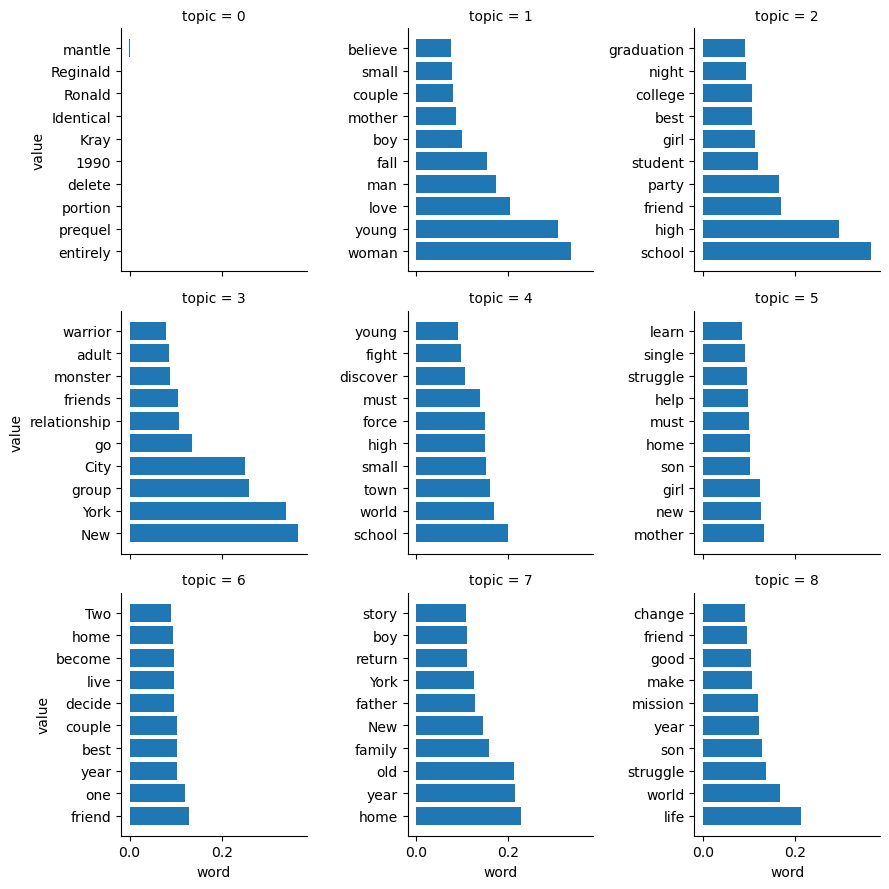

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

graph = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
_ = graph.map(plt.barh, "word", "value")

In [48]:
%precision 2
print(movies_corpus_lsi[0])

[(0, -0.1316319070126275), (1, -0.08907049105785217), (2, -0.0716661413577967), (3, 0.12847146477291152), (4, 0.10839121558835386), (5, -0.013264810326590649), (6, -0.0177725379286291), (7, -0.006185219834461175), (8, -0.1082059237674575)]


### VADER (Valence Aware Dictionary and sEntiment Reasoner) - bag of words approach
positive, negative or neutral

In [81]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I am so happy!")

{'neg': 0.0000, 'neu': 0.3180, 'pos': 0.6820, 'compound': 0.6468}

In [82]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0000, 'neu': 0.3180, 'pos': 0.6820, 'compound': 0.6468}

In [83]:
sia.polarity_scores("The weather is terrible")

{'neg': 0.5080, 'neu': 0.4920, 'pos': 0.0000, 'compound': -0.4767}

In [22]:
sia.polarity_scores("This is notebook is okay... it could be better...")

{'neg': 0.0000, 'neu': 1.0000, 'pos': 0.0000, 'compound': 0.0000}

In [25]:
movies_corpus[3]

"In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same."

In [24]:
sia.polarity_scores(movies_corpus[3])

{'neg': 0.0000, 'neu': 0.8440, 'pos': 0.1560, 'compound': 0.7096}

## Exercises

Using the same csv loaded in above `IMDB-Movie-Data.csv`. 

## Exercise 1: 

(Pandas revision) First, find the five most frequent genres in the movies dataset

In [ ]:
import numpy as np
import pandas as pd
import nltk
from gensim import corpora
movies_df = pd.read_csv("../datasets/IMDB-Movie-Data.csv")
movies_df.sample(5)

Genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
Name: count, dtype: int64

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
Name: Genre, dtype: int64
Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
Name: Genres, dtype: int64
Index(['index', 'Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors',
       'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Genres'],
      dtype='object')
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   6
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    6
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            6
Gerard Butler, Aaron Eckhart,

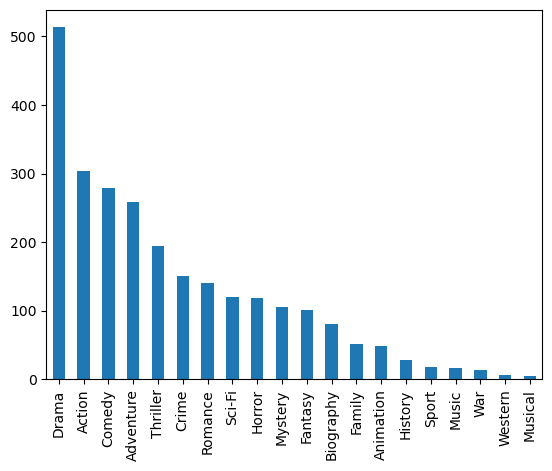

In [61]:
import numpy as np
import pandas as pd
import nltk
from gensim import corpora
imdb_movies = pd.read_csv("~/Documents/teaching/python_intro/datasets/IMDB-Movie-Data.csv")
print(imdb_movies.Genre.value_counts().head())
imdb_movies['Genres'] = imdb_movies["Genre"].apply(lambda string: string.split(","))
movies_df[ = imdb_movies.explode('Actors').reset_index()
imdb_movies_exploded_genres = imdb_movies.explode('Genres').reset_index()
print(imdb_movies_exploded_genres["Genres"].value_counts(ascending = False))
imdb_movies_exploded_genres.Genres.value_counts().plot(kind = 'bar')
print(movies_df.columns)
movies_df['match'] = movies_df['Description'].str.contains(
    movies_df['Director'], regex=False)
print(movies_df.Director.value_counts())


In [ ]:
imdb_movies['Genres'] = imdb_movies["Genre"].apply(lambda string: string.split(","))
imdb_movies_exploded_genres = imdb_movies.explode('Genres').reset_index()
imdb_movies_exploded_genres["Genres"].value_counts(ascending = False)
imdb_movies_exploded_genres.Genres.value_counts().plot(kind = 'bar')

Genre_split
Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
Name: count, dtype: int64

## Exercise 2: 

(Pandas revison) Is there any correlation between the mention of an actor's name or director's name in the description and the metascore this film achieved? 

In [121]:
import re
imdb_movies['Actor'] = imdb_movies["Actors"].apply(lambda string: string.split(","))
movies_df = imdb_movies.explode('Actor').reset_index()
movies_df['lastname'] = movies_df['Actor'].str.split(" ").str[-1]#[:,-1]

movies_df['matcha'] = movies_df.apply(
    lambda row: row['lastname'].lower() in row['Description'].lower(), axis=1
)
print(movies_df.loc[movies_df.matcha==True,"Metascore"].mean())
print(movies_df.loc[movies_df.matcha==False,"Metascore"].mean())

movies_df['match'] = movies_df.apply(
    lambda row: re.search(row['Director'], row['Description'], re.IGNORECASE) is not None,
    axis=1
)
print(movies_df.loc[movies_df.match==True,"Metascore"].mean())
print(movies_df.loc[movies_df.match==False,"Metascore"].mean())


53.541666666666664
59.02285560634579
nan
58.9877103927331


## Exercise 3: 

Before we go on to analysis, first check to if the phrase "see full summary" is present at the end of movie descriptions. If so, remove this phrase.  

For example:

In [7]:
movies_df.loc[183]['Description']

'Marc (Tom Hughes) is diagnosed with a disease and is given one year left to live. Unable to accept his own end, he decides to freeze his body. Sixty years later, in the year 2084, he ... See full summary »'

In [104]:
movies_df[movies_df['Description'].str.contains('summary', case=False, na=False) ]['Description']

49     A director (Charlize Theron) of an internation...
183    Marc (Tom Hughes) is diagnosed with a disease ...
250    Anne is at a crossroads in her life. Long marr...
322    In London, a real-estate scam puts millions of...
356    Samuel parties hard in the Marseille area of F...
370    A young street magician (Jacob Latimore) is le...
401    PAUL and JENNIFER HEMDALE have just moved into...
444    "The Thinning" takes place in a post-apocalypt...
477    A psychological thriller about a man who bumps...
490    Martin was a normal teenage boy before the cou...
654    Somerset, October 2014. When Clover Catto (Ell...
699    When an idealistic romantic gets fired from hi...
819    Four friends gather at an elegant home during ...
847    In the world of high-end art auctions and anti...
861    The story revolves around Nishimiya Shoko, a g...
890    Gunz (Dylan Duffus) is thrust into a world of ...
898    A romantically challenged morning show produce...
947    This ripped-from-the-hea

In [141]:
# Write your solution here... 
movies_df = imdb_movies.explode('Actor').reset_index()
print(movies_df[movies_df['Description'].str.contains('summary', case=False, na=False) ]['Description'].iloc[1])
movies_df['Description'] = movies_df['Description'].str.replace(
    r'see full summary', '', case=False, regex=True
).str.strip()
print(movies_df[movies_df['Description'].str.contains('summary', case=False, na=False) ]['Description'])

A director (Charlize Theron) of an international aid agency in Africa meets a relief aid doctor (Javier Bardem) amidst a political/social revolution, and together face tough choices ... See full summary »
Series([], Name: Description, dtype: object)


## Exercise 4: 

Also consider how you would clean up any inconsistencies in the text descriptions, such as variation in casing, symbols (e.g. `\`, `>>` etc) and other syntax which could interfere with analysis.

In [9]:
# for example...
movies_df.loc[444]['Description']

'"The Thinning" takes place in a post-apocalyptic future where population control is dictated by a high-school aptitude test. When two students (Logan Paul and Peyton List) discover the test... See full summary »'

In [ ]:
# for example...
movies_df.loc[401]['Description']

'PAUL and JENNIFER HEMDALE have just moved into their dream house. But their happy marriage is about to be put to the test as they slowly discover the secret behind the black room in the ... See full summary »'

In [228]:
movies_corpus

18      A jazz pianist falls for an aspiring actress i...
25      A spacecraft traveling to a distant colony pla...
31      The story of a team of female African-American...
41      Gloria is an out-of-work party girl forced to ...
46      WWII American Army Medic Desmond T. Doss, who ...
                              ...                        
2528    A chronicle of Martin Luther King's campaign t...
2533    An eight-year-old boy is thought to be a lazy ...
2537    Four years after graduation, an awkward high s...
2544    A tight-knit team of rising investigators, alo...
2547    Romantic sparks occur between two dance studen...
Name: Description, Length: 513, dtype: object

## Exercise 5: 

Identify the most frequent words used in descriptions of Drama films.

In [362]:
movies_corpus = imdb_movies_exploded_genres.loc[(imdb_movies_exploded_genres["Genres"] == "Drama"),"Description"].unique()

pre_processor = DocumentPreProcessor()
pre_processed_corpus = list(map(pre_processor.preprocess, movies_corpus))
dictionary = corpora.Dictionary(pre_processed_corpus)
movies_corpus_bow = [dictionary.doc2bow(doc_tokens) for doc_tokens in pre_processed_corpus]
top_words = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
top_dict = { dictionary[token_id]: freq for token_id, freq in top_words }
print(list(top_dict.items())[:50])

[('life', 77), ('young', 77), ('find', 50), ('man', 48), ('story', 47), ('woman', 46), ('family', 40), ('take', 40), ('love', 38), ('year', 36), ('become', 35), ('world', 34), ('girl', 33), ('two', 32), ('new', 31), ('get', 30), ('one', 27), ('live', 26), ('help', 26), ('work', 25), ('change', 25), ('mysterious', 24), ('turn', 24), ('wife', 24), ('try', 24), ('force', 22), ('home', 22), ('friend', 22), ('American', 21), ('old', 21), ('boy', 21), ('go', 21), ('struggle', 21), ('father', 20), ('order', 20), ('make', 20), ('child', 20), ('fall', 19), ('New', 19), ('school', 19), ('lead', 19), ('mother', 19), ('daughter', 19), ('leave', 18), ('journey', 18), ('high', 18), ('student', 17), ('fight', 17), ('set', 16), ('day', 16)]


`pip install wordcloud`

  `pip3 install wordcloud`

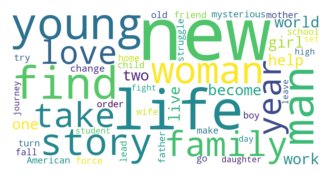

In [342]:
top_words = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
top_dict = { dictionary[token_id]: freq for token_id, freq in top_words }
alist = list(top_dict.keys())[:50]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(alist))

plt.figure(figsize=(4, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Exercise 6: 

Now apply TF-IDF to the descriptions of Drama films, to work out distinctive expressions, not just the most frequent words. 


In [418]:
#from sklearn.feature_extraction.text import TfidfTransformer
from gensim.models import TfidfModel
from gensim.models import LsiModel

tfidf_model = TfidfModel(movies_corpus_bow) 
movies_corpus_tfidf = tfidf_model[movies_corpus_bow]
[(dictionary[idx], tfidf_score) for idx, tfidf_score in tfidf_model[movies_corpus_bow[0]]]


[('Angeles', 0.31495390761347863),
 ('Los', 0.31495390761347863),
 ('actress', 0.3781254143492738),
 ('aspire', 0.34653966098137623),
 ('fall', 0.2567458661884826),
 ('jazz', 0.4861178184058003),
 ('pianist', 0.4861178184058003)]

## Exercise 7: 

Now apply topic modelling (LSA) for this genre. 
What do you see? 

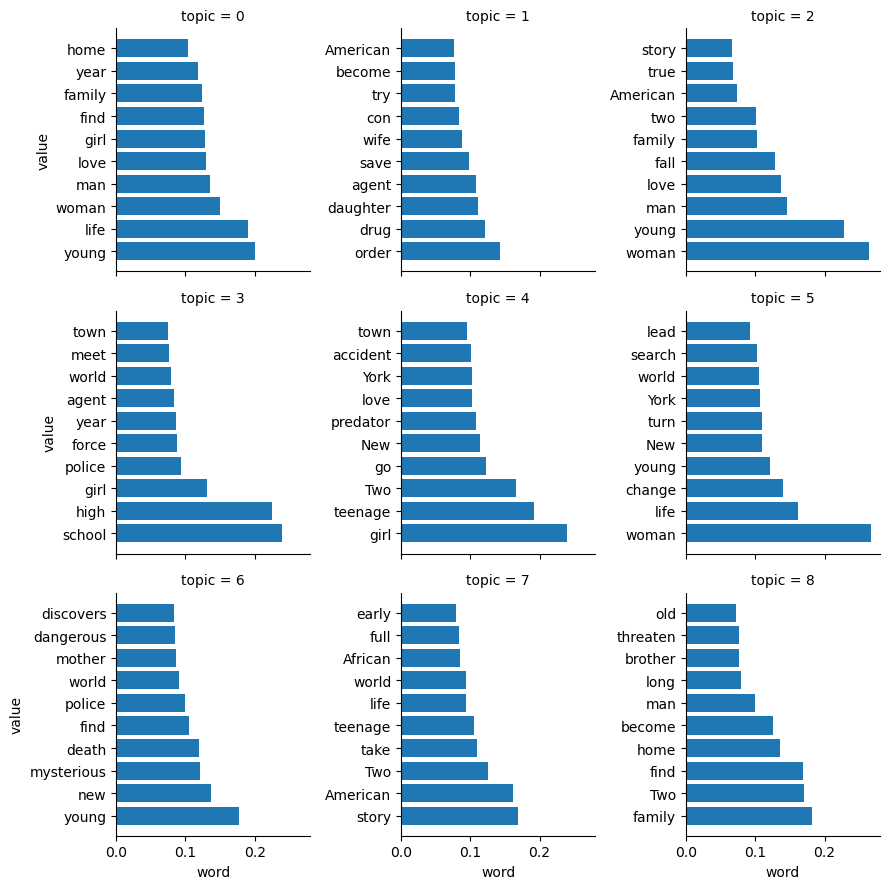

In [420]:
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import seaborn as sns

lsi_model = LsiModel(movies_corpus_tfidf, id2word=dictionary, num_topics=9)
movies_corpus_lsi = lsi_model[movies_corpus_tfidf]
# Number of top words per topic
num_words = 10

topic_words = pd.DataFrame()

for idx, topic in enumerate(lsi_model.get_topics()):
    # get the token ids of the "num_words" top words per topic
    # NB: numpy.argsort() returns the indices that would sort an array.
    top_feature_ids = topic.argsort()[-num_words:][::-1]
    # get the values corresponding to each word/token
    feature_values = topic[top_feature_ids]
    # get the actual token/word out of its id
    words = [dictionary[id_] for id_ in top_feature_ids]
    # put topic index, word/token, and value into a DataFrame
    topic_df = pd.DataFrame({
        "value": feature_values,
        "word": words,
        "topic": idx
    })
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

graph = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
_ = graph.map(plt.barh, "word", "value")

## Exercise 8: 

For the five most common genres you identified earlier, identify whether there are distinctive TF-IDF patterns 

[('must', 35), ('world', 34), ('force', 32), ('new', 31), ('young', 28), ('find', 27), ('fight', 25), ('one', 24), ('team', 22), ('take', 21)]


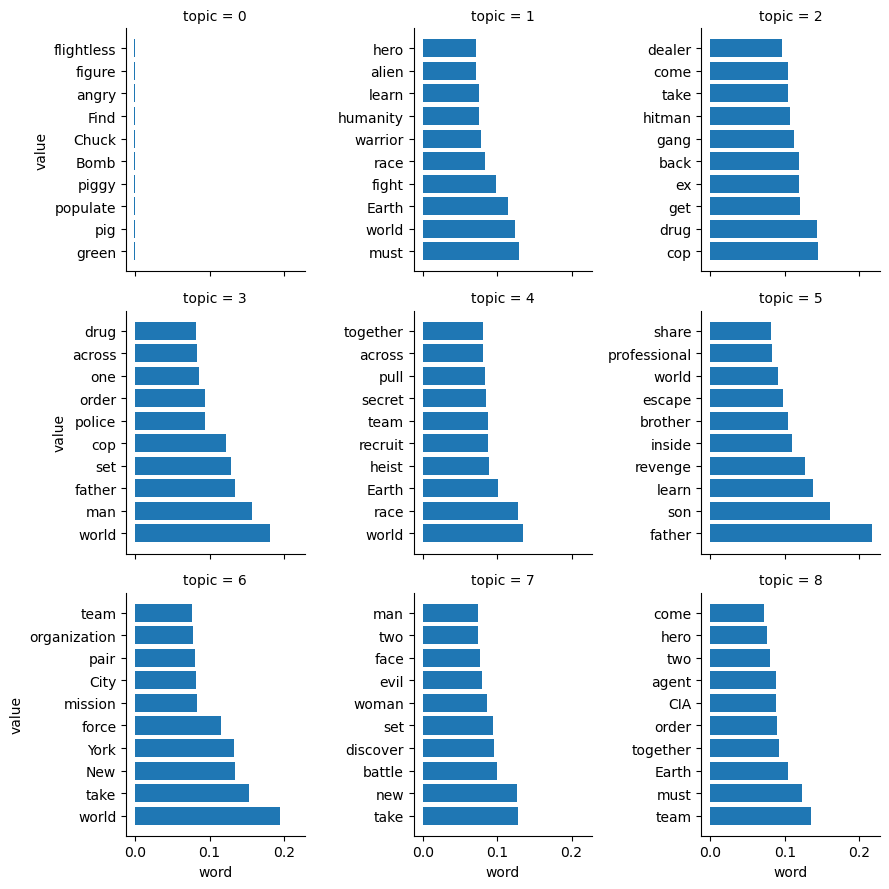

In [422]:
movies_corpus = imdb_movies_exploded_genres.loc[(imdb_movies_exploded_genres["Genres"] == "Action"),"Description"].unique()

pre_processor = DocumentPreProcessor()
pre_processed_corpus = list(map(pre_processor.preprocess, movies_corpus))
dictionary = corpora.Dictionary(pre_processed_corpus)
movies_corpus_bow = [dictionary.doc2bow(doc_tokens) for doc_tokens in pre_processed_corpus]
top_words = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
top_dict = { dictionary[token_id]: freq for token_id, freq in top_words }
print(list(top_dict.items())[:10])
tfidf_model = TfidfModel(movies_corpus_bow) 
movies_corpus_tfidf = tfidf_model[movies_corpus_bow]
lsi_model = LsiModel(movies_corpus_tfidf, id2word=dictionary, num_topics=9)
movies_corpus_lsi = lsi_model[movies_corpus_tfidf]
# Number of top words per topic
num_words = 10

topic_words = pd.DataFrame()

for idx, topic in enumerate(lsi_model.get_topics()):
    # get the token ids of the "num_words" top words per topic
    # NB: numpy.argsort() returns the indices that would sort an array.
    top_feature_ids = topic.argsort()[-num_words:][::-1]
    # get the values corresponding to each word/token
    feature_values = topic[top_feature_ids]
    # get the actual token/word out of its id
    words = [dictionary[id_] for id_ in top_feature_ids]
    # put topic index, word/token, and value into a DataFrame
    topic_df = pd.DataFrame({
        "value": feature_values,
        "word": words,
        "topic": idx
    })
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

graph = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
_ = graph.map(plt.barh, "word", "value")

[('world', 17), ('must', 17), ('find', 14), ('Earth', 13), ('force', 12), ('alien', 12), ('one', 12), ('young', 12), ('fight', 11), ('take', 10)]


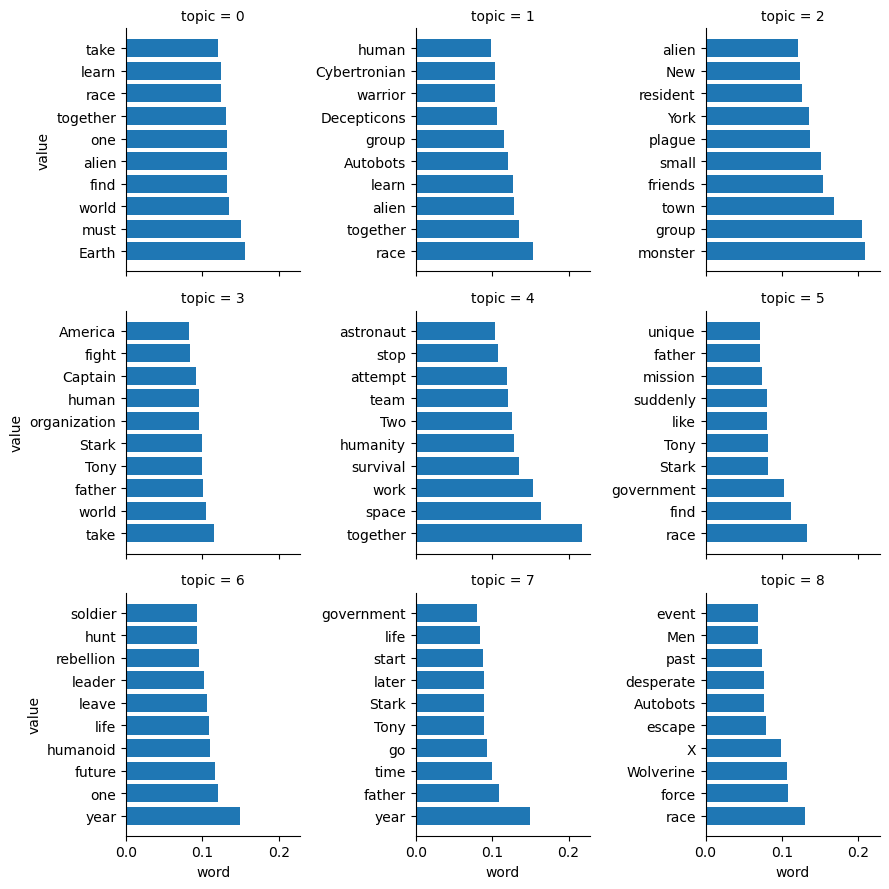

In [424]:
movies_corpus = imdb_movies_exploded_genres.loc[(imdb_movies_exploded_genres["Genres"] == "Sci-Fi"),"Description"].unique()

pre_processor = DocumentPreProcessor()
pre_processed_corpus = list(map(pre_processor.preprocess, movies_corpus))
dictionary = corpora.Dictionary(pre_processed_corpus)
movies_corpus_bow = [dictionary.doc2bow(doc_tokens) for doc_tokens in pre_processed_corpus]
top_words = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
top_dict = { dictionary[token_id]: freq for token_id, freq in top_words }
print(list(top_dict.items())[:10])
tfidf_model = TfidfModel(movies_corpus_bow) 
movies_corpus_tfidf = tfidf_model[movies_corpus_bow]
lsi_model = LsiModel(movies_corpus_tfidf, id2word=dictionary, num_topics=9)
movies_corpus_lsi = lsi_model[movies_corpus_tfidf]
# Number of top words per topic
num_words = 10

topic_words = pd.DataFrame()

for idx, topic in enumerate(lsi_model.get_topics()):
    # get the token ids of the "num_words" top words per topic
    # NB: numpy.argsort() returns the indices that would sort an array.
    top_feature_ids = topic.argsort()[-num_words:][::-1]
    # get the values corresponding to each word/token
    feature_values = topic[top_feature_ids]
    # get the actual token/word out of its id
    words = [dictionary[id_] for id_ in top_feature_ids]
    # put topic index, word/token, and value into a DataFrame
    topic_df = pd.DataFrame({
        "value": feature_values,
        "word": words,
        "topic": idx
    })
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

graph = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
_ = graph.map(plt.barh, "word", "value")

## Exercise 9 

Combine the descriptions per genre to work out if there are distinctive terms or unique themes for each genre. 

In [445]:
# Write your solution here
for i in ['Action','Sci-Fi','Horror','Drama']:
    movies_corpus = imdb_movies_exploded_genres.loc[(imdb_movies_exploded_genres["Genres"] == i),"Description"].unique()

    pre_processor = DocumentPreProcessor()
    pre_processed_corpus = list(map(pre_processor.preprocess, movies_corpus))
    dictionary = corpora.Dictionary(pre_processed_corpus)
    movies_corpus_bow = [dictionary.doc2bow(doc_tokens) for doc_tokens in pre_processed_corpus]
    tfidf_model = TfidfModel(movies_corpus_bow) 
    movies_corpus_tfidf = tfidf_model[movies_corpus_bow]
    lsi_model = LsiModel(movies_corpus_tfidf, id2word=dictionary, num_topics=9)
    movies_corpus_lsi = lsi_model[movies_corpus_tfidf]
    # Number of top words per topic
    num_words = 10

    topic_words = pd.DataFrame()

    for idx, topic in enumerate(lsi_model.get_topics()):
        # get the token ids of the "num_words" top words per topic
        # NB: numpy.argsort() returns the indices that would sort an array.
        top_feature_ids = topic.argsort()[-num_words:][::-1]
        # get the values corresponding to each word/token
        feature_values = topic[top_feature_ids]
        # get the actual token/word out of its id
        words = [dictionary[id_] for id_ in top_feature_ids]
        # put topic index, word/token, and value into a DataFrame
        topic_df = pd.DataFrame({
            "value": feature_values,
            "word": words,
            "topic": idx
        })
        topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

    print(f"Top distinctive terms for {i}: {topic_words.word}")


Top distinctive terms for Action: 0        world
1         must
2         save
3        young
4          one
        ...   
85        join
86       human
87    discover
88        race
89        crew
Name: word, Length: 90, dtype: object
Top distinctive terms for Sci-Fi: 0       Earth
1        must
2       world
3        find
4       alien
       ...   
85       York
86       take
87       save
88    Katniss
89    soldier
Name: word, Length: 90, dtype: object
Top distinctive terms for Horror: 0           young
1           woman
2           cabin
3          friend
4          family
         ...     
85            New
86           evil
87    Corporation
88       Umbrella
89          Alice
Name: word, Length: 90, dtype: object
Top distinctive terms for Drama: 0           wit
1       diamond
2     syndicate
3      smuggler
4         match
        ...    
85        leave
86         full
87       become
88         take
89        world
Name: word, Length: 90, dtype: object
